In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing necessary libraries

In [2]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 

## Loading the Handwritten digit dataset

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


## Data exploration

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
X_train[0].shape

(28, 28)

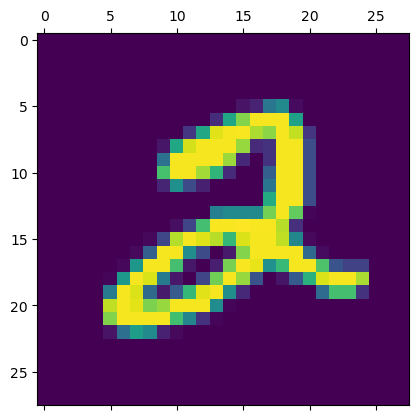

In [17]:
plt.matshow(X_train[5])

In [23]:
y_train[5]

2

## Observation :
y_train contains numbers between 0 and 9 and X_train has digit images of 0 to 9.

## Flattening the Train and test data

In [24]:
X_train.shape

(60000, 28, 28)

In [26]:
X_test.shape

(10000, 28, 28)

In [29]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [30]:
X_train_flattened[5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,
        25, 100, 122,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Creating the Neural Network

In [36]:
model = keras.Sequential([                                              #Stack of layers in the neural network, every layer would be considered as one element.
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')  
])

#Neural Network Compliation
model.compile(
    optimizer ='adam',
    loss='sparse_categorical_crossentropy',
    metrics =['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)  #This is where the model training happens

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 9.9937 - accuracy: 0.8385
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.8737 - accuracy: 0.8793
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5769 - accuracy: 0.8833
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3940 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4616 - accuracy: 0.8856


## Observation :
Accuracy comes to be low. Since values for the images are between 0-255; we need to scale them between 0 & 1.

In [37]:
X_train = X_train/255
X_test = X_test/255

In [38]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [40]:
#Scaled Values
X_test_flattened[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [41]:
model = keras.Sequential([                                              #Stack of layers in the neural network, every layer would be considered as one element.
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')  
])

#Neural Network Compliation
model.compile(
    optimizer ='adam',
    loss='sparse_categorical_crossentropy',
    metrics =['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)  #This is where the model training happens

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4686 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9261


## Observation :
Model/Neural Network accuracy imporved from 89% to 92%.

## Evaluating the Neural Network on the test dataset

In [42]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2697 - accuracy: 0.9244


[0.26965591311454773, 0.9243999719619751]

## Prediction

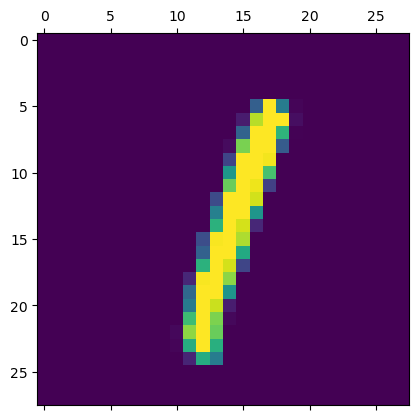

In [52]:
plt.matshow(X_test[5])

In [53]:
y_pred = model.predict(X_test_flattened)
y_pred

 22/313 [=>............................] - ETA: 0s 

313/313 [==============================] - 1s 3ms/step


array([[2.7940383e-02, 3.7363293e-07, 4.0317722e-02, ..., 9.9986821e-01,
        8.6444274e-02, 7.2016597e-01],
       [4.2706123e-01, 4.6293796e-03, 9.9904299e-01, ..., 1.3389057e-12,
        1.6008881e-01, 2.5992386e-09],
       [3.8305545e-04, 9.9289769e-01, 6.2728381e-01, ..., 1.3411094e-01,
        3.7793308e-01, 5.2755959e-02],
       ...,
       [3.6649917e-06, 4.6193868e-06, 8.1745011e-04, ..., 1.9841896e-01,
        4.3920353e-01, 7.8736037e-01],
       [1.5917320e-04, 1.9452191e-04, 1.3430406e-04, ..., 3.5573757e-05,
        5.6841546e-01, 9.6736178e-05],
       [1.4982378e-02, 2.9356134e-10, 8.8903375e-02, ..., 1.7125487e-08,
        2.5007038e-04, 5.9909189e-07]], dtype=float32)

In [55]:
np.argmax(y_pred[5])    #This returns the max index value from the predictions the model made.

1

## Evaluation Metrics

In [56]:
#Building the Confusion Matrix

In [58]:
y_pred_labels = [np.argmax(i) for i in y_pred]   #returning the first 5 predicted labels
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [60]:
y_test[:5]      #cross-validating it with the truth data

array([7, 2, 1, 0, 4], dtype=uint8)

In [62]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    1,    0,    5,    4,    3,    2,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   6,    9,  910,   20,    9,    6,   12,   12,   43,    5],
       [   4,    0,   15,  912,    0,   31,    2,   12,   26,    8],
       [   1,    1,    2,    1,  916,    0,   11,    4,    9,   37],
       [  10,    2,    1,   23,    9,  791,   15,    6,   28,    7],
       [  14,    3,    3,    2,    8,   16,  908,    2,    2,    0],
       [   2,    5,   20,    7,    8,    0,    0,  952,    4,   30],
       [   6,    7,    5,   20,    9,   37,    8,   12,  861,    9],
       [  10,    7,    1,   10,   27,    8,    0,   24,    6,  916]])>

Text(95.72222222222221, 0.5, 'Truth data')

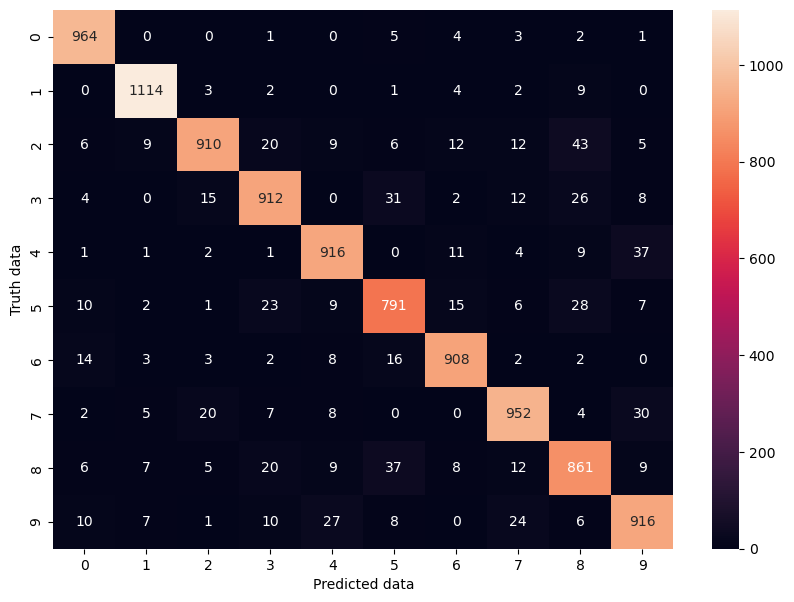

In [66]:
#Visualising the confusion matrix
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted data')
plt.ylabel('Truth data') 

## Observations : 
Take prediction of lets say the digit '1'
1. The prediction of the digit '1' was correct 1114 times.
2. 9 times our model gave digit '1' but was predicted as 8.

Similar & More observations and conclusions can be made for rest of the digits.

## Key Takeaways :
1. All the predictions in the diagonal of the confusion matrix are the correct predictions.
2. All the predictions out of the diagonal are the incorrect predictions.

## Neural Network optimisation using Hidden layers

In [67]:
model = keras.Sequential([                                             
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),     #choosing the number of neurons in the hidden layer is a method of hit and trial but should be less then the input shape attribute.
    keras.layers.Dense(10, activation='sigmoid')  
])

#Neural Network Compliation
model.compile(
    optimizer ='adam',
    loss='sparse_categorical_crossentropy',
    metrics =['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2783 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1276 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0888 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0665 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0524 - accuracy: 0.9835


In [68]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9765


[0.07943610846996307, 0.9764999747276306]

In [69]:
y_pred = model.predict(X_test_flattened)
y_predict_labels = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth data')

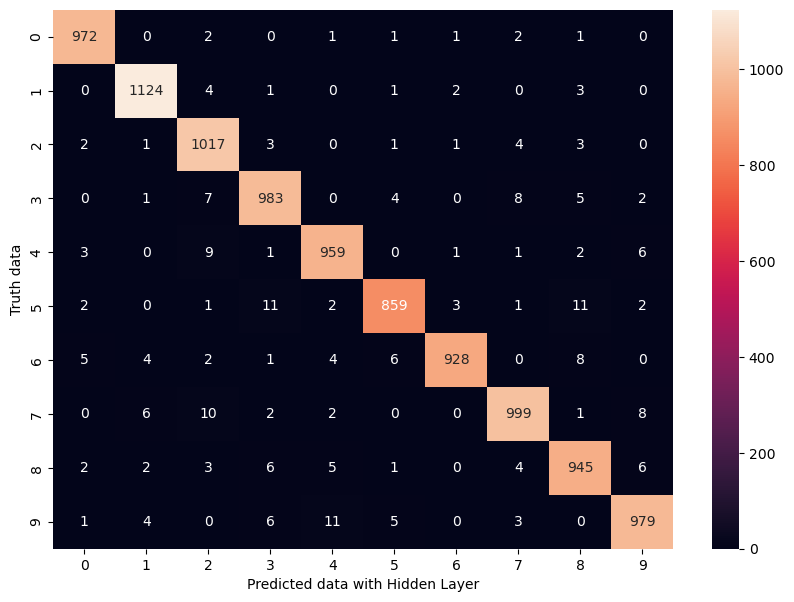

In [70]:
cm_op = tf.math.confusion_matrix(labels=y_test, predictions = y_predict_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm_op, annot=True, fmt='d')
plt.xlabel('Predicted data with Hidden Layer')
plt.ylabel('Truth data')

## Final Conclusions :
1. After adding Hidden layer, the accuracy of Neural Network increased from 92% to 97% (approx. 5% accuracy increase) 
2. It can be observed in the heatmap for optimised Neural Network that, no. of incorrect predictions have decreased for truth data significantly.

## Notes : 
1. The number of Hidden layers can be increased as per the use case, here I have just used one layer for tracking the loss and the accuracy.
2. This Neural Network can be further optimised by tuning the parameters.